# Kurapati Venkatesh
# 09012021
# Topic: K-means Clustering

# ---------------------------------------------------------------------------

## 3.)	Analyze the information given in the following ‘Insurance Policy dataset’ to             create clusters of persons falling in the same type. Refer to Insurance Dataset.csv

## -----------------------------------------------------------------------------------

### Business Problem
#### 1. The chosen problem is one that affects a range of businesses when trying to personalise and specialise their marketing strategy to their customers, in order to have a deeper insight on their activities and predict how new ones will behave.
#### 2. Customer segmentation is the subdivision of the market (customers) into groups with similar characteristics [1]. The focus of this report will be in customer segmentation in the insurance industry but it could also be applied in a range of industries.

## -------------------------------------------------------------------------------------------

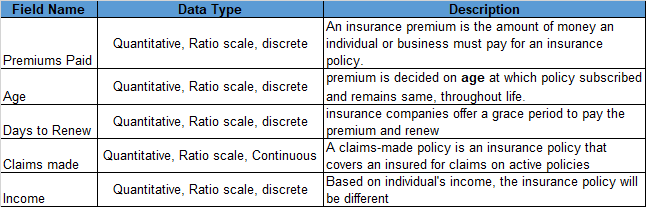

## ---------------------------------------------------------------------------------------------------------------------------

In [2]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [3]:
ins = pd.read_csv("G:/360digit/assignments meterial/K_means clustering/Insurance Dataset.csv")

In [4]:
ins.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


This dataset is free of missing data or NA data

### ----------------------------------------------EDA---------------------------------------------------

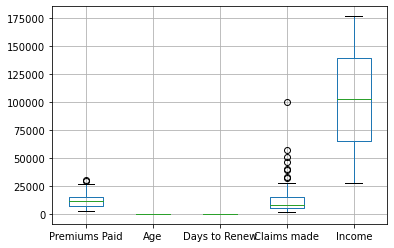

In [6]:
ins.boxplot()

Looking at the box plot, it seems that the variables Premiums paid, Claims made have outlier present in the variables. These outliers value needs to be teated.

In [7]:
# create a user defined function remove_ol for getting the threshold value from IQR. 
def remove_ol(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

### Outliers Treatment:

#### Premiums Paid:

In [8]:
low, up = remove_ol(ins['Premiums Paid'])
ins['Premiums Paid'] = np.where(ins['Premiums Paid'] > up, up, ins['Premiums Paid']) 
ins['Premiums Paid'] = np.where(ins['Premiums Paid'] < low, low, ins['Premiums Paid']) 

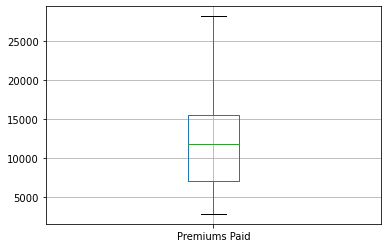

In [9]:
ins.boxplot(['Premiums Paid'])

#### Claims made:

In [10]:
low, up = remove_ol(ins['Claims made'])
ins['Claims made'] = np.where(ins['Claims made'] > up, up, ins['Claims made']) 
ins['Claims made'] = np.where(ins['Claims made'] < low, low, ins['Claims made']) 

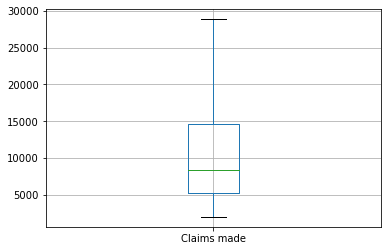

In [11]:
ins.boxplot(['Claims made'])

##### Histogram Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161C8FD6910>,
      dtype=object)

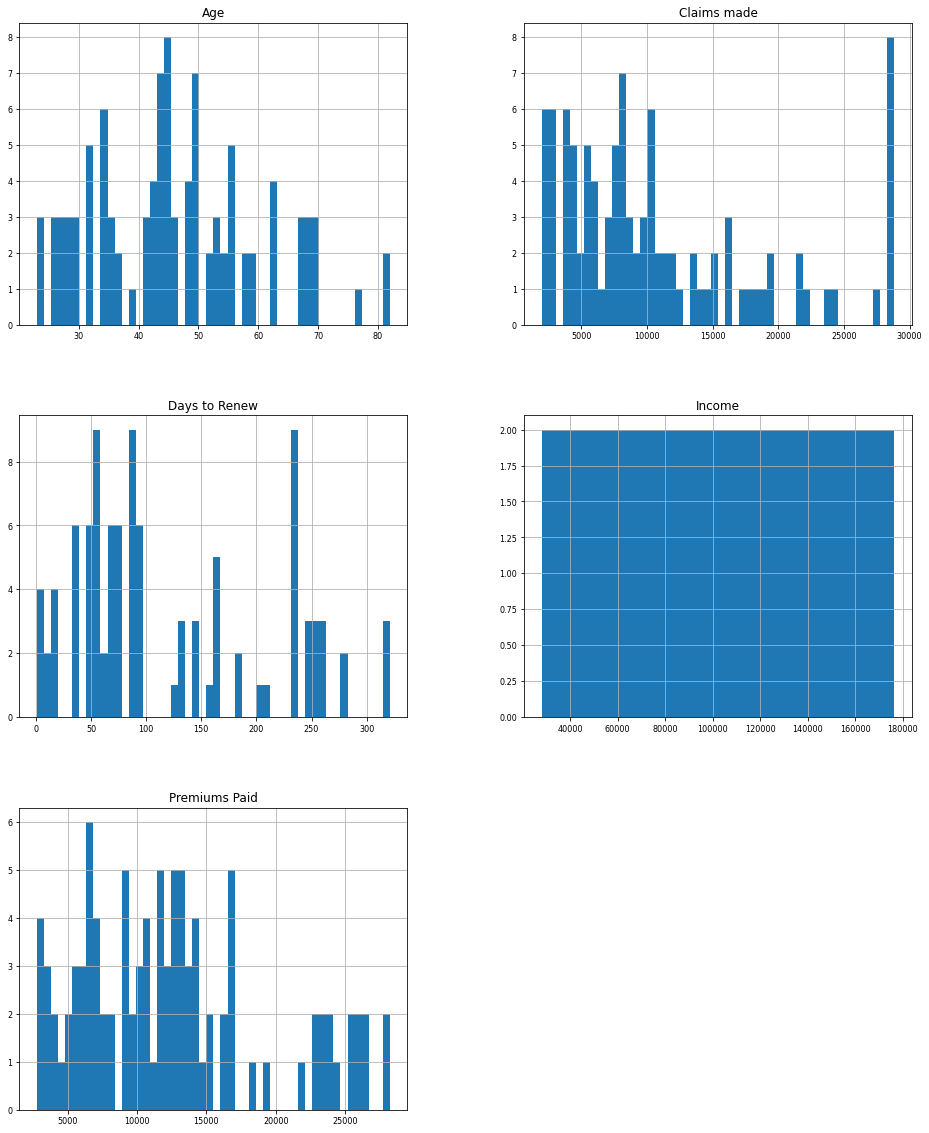

In [12]:
ins.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

##### Corelation Analysis:

In [13]:
ins.corr()

,Premiums Paid,Age,Days to Renew,Claims made,Income
Premiums Paid,1.000000,0.549404,0.133839,0.739610,0.885777
Age,0.549404,1.000000,0.118577,0.429493,0.309009
Days to Renew,0.133839,0.118577,1.000000,0.706600,0.090823
Claims made,0.739610,0.429493,0.706600,1.000000,0.649591
Income,0.885777,0.309009,0.090823,0.649591,1.000000


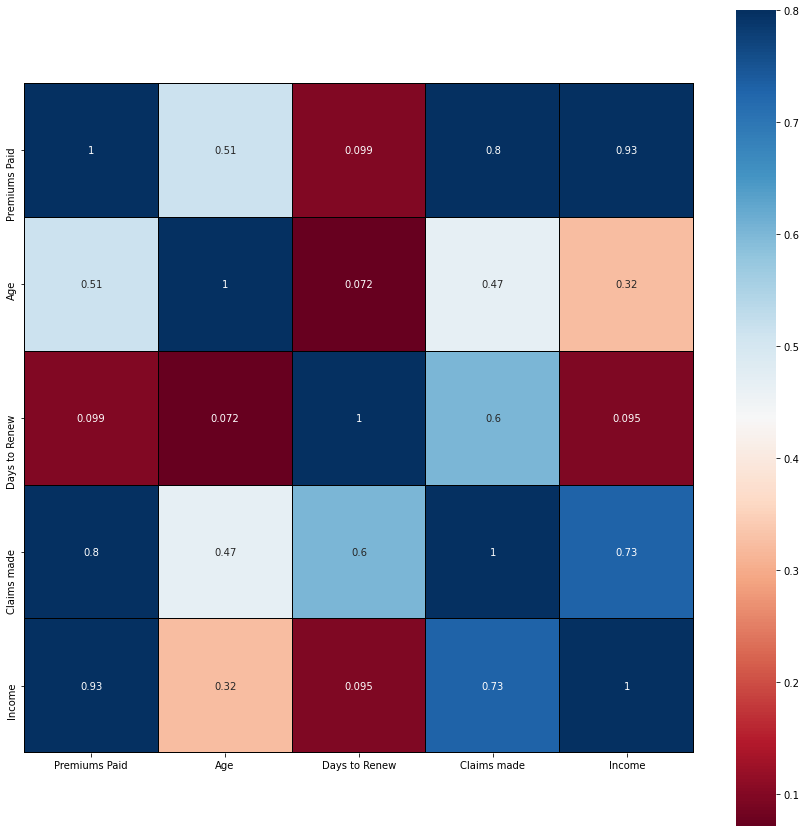

In [14]:
corr = ins.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

Income and Premiums Paid are highly corelated, 
Claims made and Premiums Paid are highly corelated.

### Normalization function 

In [15]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

#### Normalized data frame 

In [16]:
df_norm = norm_func(ins)
df_norm.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.071156,0.000000
1,0.005900,0.067797,0.403125,0.011768,0.010101
2,0.011799,0.084746,0.446875,0.021821,0.020202
3,0.017699,0.118644,0.200000,0.000000,0.030303
4,0.023599,0.152542,0.171875,0.001147,0.040404


#### Scree plot or Elbow curve ######################################################

In [17]:
TWSS = []
k = list(range(2, 10))

In [18]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[21.37095544074801,
 15.758410404424245,
 12.049885289207369,
 9.751890760469461,
 8.105923668042509,
 7.269062543770997,
 6.6538947840894185,
 5.9763188094025335]

Text(0, 0.5, 'total_within_SS')

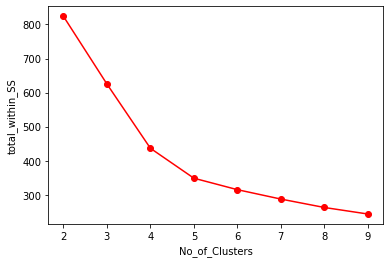

In [53]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

#### Selecting 5 clusters as optimum number of clusters from scree plot.

In [20]:
model = KMeans(n_clusters = 5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [22]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
ins['clust'] = mb # creating a  new column and assigning it to new column 

In [23]:
ins.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800.0,26,233,3890.076336,28000,1
1,2950.0,27,130,2294.444444,29500,1
2,3100.0,28,144,2564.545455,31000,1
3,3250.0,30,65,1978.260870,32500,1
4,3400.0,32,56,2009.090909,34000,1


In [24]:
ins = ins.iloc[:,[5,0,1,2,3,4]]
ins.head()

,clust,Premiums Paid,Age,Days to Renew,Claims made,Income
0,1,2800.0,26,233,3890.076336,28000
1,1,2950.0,27,130,2294.444444,29500
2,1,3100.0,28,144,2564.545455,31000
3,1,3250.0,30,65,1978.260870,32500
4,1,3400.0,32,56,2009.090909,34000


In [25]:
ins.groupby(ins.clust).mean()
ins.to_csv("Kmeans_insurance.csv", encoding = "utf-8")

import os
os.getcwd()

'C:\\Users\\Hp\\Documents\\jjjpter'

### Business Benefit: 

#### Once the segments are identified, marketing messages and advertisements can be customized for each segment. The better the segment(s) chosen for targeting by this Insurance industry, the more successful the business will be in the market.
#### In this case, K-means Clustering can help this industry organize data into groups to identify similarities and, equally important, dissimilar groups and characteristics, so that the insurances subscription will be more.